<a href="https://colab.research.google.com/github/CamiloE/Proyectos-Personales/blob/master/Precios_de_las_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por medio de este dataset se va a crear un modelo en el que se logre predecir el precio de unas casas a partir de datos  tomados como el suburbio, la dirección, el número de habitaciones, de baños, el codigo postal, tamaño del terreno, area construida, la region, entre otras

In [1]:
#Importar librerias importantes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importar base de datos
dataframe =  pd.read_csv("https://raw.githubusercontent.com/CamiloE/Proyectos-Personales/master/Melbourne_housing_FULL.csv",sep=',')
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Por intuicion, se puede ver que la latitud y longitud no son importantes para el precio.

In [4]:
dataframe.drop(columns=['Lattitude','Longtitude'],inplace=True)
dataframe.shape

KeyError: ignored

In [5]:
dataframe['Postcode'].value_counts()

3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3139.0      1
3159.0      1
3793.0      1
3788.0      1
3428.0      1
Name: Postcode, Length: 211, dtype: int64

Se puede ver que en el dataset hay 19 caracteristicas y 63023 muestras. \
Lo que hay que hacer es ver que tipo de dato es cada característica.

In [6]:
dataframe.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

Lo mejor es convertir el codigo postal a variable categorica

In [7]:
dataframe['Postcode']=dataframe['Postcode'].astype('category')

Se puede ver qu existen 8 características categoricas y el resto son numéricas. 
Las caracteristicas son las siguientes:
- Suburb: Suburbio o Barrio donde esta la casa
- Address: Dirección 
- Rooms: El numero de habitaciones
- Type: El tipo de vivienda donde 'h' corresponde a casas, cabañas, 'u' es casas tipounit y 't' se refiere a viviendas adosadas.
- SellerG: Agencia de Ventas
- Date: fecha de la venta
- Distance: Distancia en km desde la casa hasta el centro de Melbourne
- Regionname: Region donde se encuentra ubicada.
- Propertycount: Numero de propiedades en el suburbio
- Bedroom 2: Caracteristica relacionada al numero de habitaciones. 
- Bathroom: El numero de baños 
- Car: Numero de espacios para estacionar el carro
- Landsize: Corresponde al area de la propiedad en metros que no esta construida 
- Building Area: Area Construida en metros 
- Price: Precio en dolares australianos
- YearBuilt: Año en que se construyo la casa
- CouncilArea: Consejo de gobierno de la zona
- Method: Metodo con el que se adquirio la casa. 
S - propiedad vendida;
SP - propiedad vendida anteriormente;
PI: propiedad transferida;
PN - vendido antes no revelado;
SN - vendido no revelado;
NB: sin oferta;
VB: oferta del proveedor;
W - retirado antes de la subasta;
SA - vendido después de la subasta;
SS - vendido después del precio de la subasta no revelado.
N / A: el precio o la oferta más alta no están disponibles.

In [8]:
dataframe.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0


Lo siguente es mirar si se encuentran valores nulos en las columnas

In [ ]:
dataframe.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Regionname        True
Propertycount     True
dtype: bool

Como se sabe que hay valores nulos en algunas columnas con valores nulos, lo que sigue es mirar cuantos hay en cada columna para poder proceder con la estrategia.

In [9]:
dataframe.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

Se puede ver que hay varias columnas con valores nulos, se destaca que en la columna del area construida mas de la mitad de los datos son nulos pero como esta caracteristica influye entonces no se puede eliminar la columna. Entonces lo mejor es eliminarle las filas con valores nulos.

In [10]:
dataframe.dropna(axis='index',subset=['BuildingArea'],inplace=True)
dataframe.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3086
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               232
Landsize         1602
BuildingArea        0
YearBuilt         504
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
dataframe.shape#Cantidad de datos y caracteristicas despues de  eliminar las muestras con valores nulos de la columna del areaconstruida

(13742, 19)

In [13]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13742.0,3.148377e+00,0.973653,1.0,3.0,3.0,4.0,12.0
Price,10656.0,1.087051e+06,677176.114541,131000.0,640000.0,892500.0,1330000.0,9000000.0
Distance,13742.0,1.135528e+01,7.100975,0.0,6.4,10.2,14.2,48.1
Bedroom2,13742.0,3.126255e+00,0.975127,0.0,3.0,3.0,4.0,12.0
Bathroom,13742.0,1.691239e+00,0.737851,1.0,1.0,2.0,2.0,9.0
Car,13510.0,1.723168e+00,1.007877,0.0,1.0,2.0,2.0,26.0
Landsize,12140.0,5.307829e+02,1135.598029,0.0,212.0,479.0,656.0,44500.0
BuildingArea,13742.0,1.602564e+02,401.267060,0.0,102.0,136.0,188.0,44515.0
YearBuilt,13238.0,1.965004e+03,37.849163,1196.0,1940.0,1970.0,2000.0,2106.0
Propertycount,13742.0,7.485790e+03,4314.543625,129.0,4387.0,6567.0,10331.0,21650.0


Con la descripcion de las columnas se ve que hay muestras que tienen areas construidas equivalentes a 0 lo cual no tiene sentido y por eso se eliminaran. Se realiza un boxplot para conocer la distribucion de estos valores.

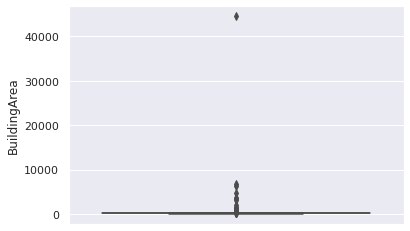

In [14]:
sns.boxplot(x=None,data=dataframe,y='BuildingArea')

Se puede ver que hay una muestra de un area construida que es demasiado grande y no tiene sentido. Entonces para no dañar nuestro modelo, lo mejor sera eliminarla.

In [15]:
dataframe.reset_index(drop=True,inplace=True)
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,4019.0


In [16]:
dataframe.loc[dataframe.BuildingArea>40000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
9588,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,Northern Victoria,849.0


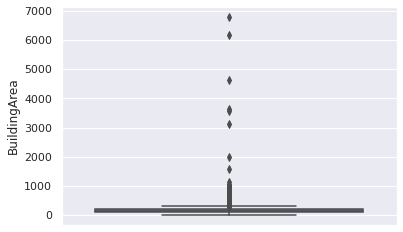

In [17]:
dataframe.drop(labels=[9588],inplace=True,axis='index')
sns.boxplot(x=None,data=dataframe,y='BuildingArea')

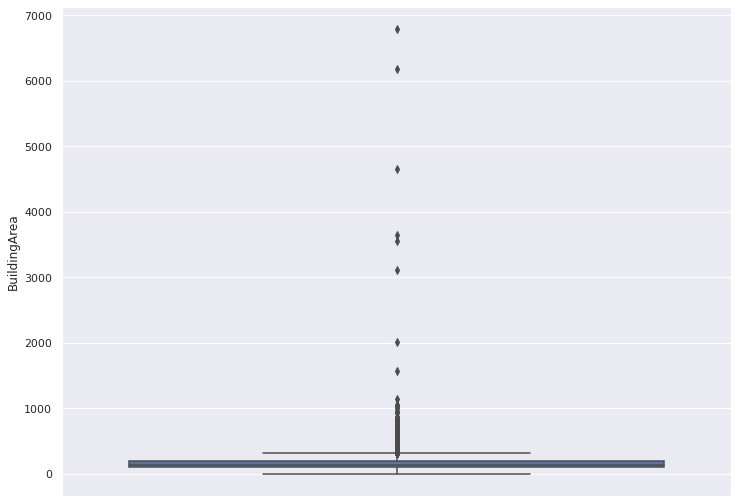

In [ ]:
plt.figure(figsize=(12,9))
sns.boxplot(x=None,data=dataframe,y='BuildingArea')

In [18]:
dataframe.loc[dataframe.BuildingArea>1000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
692,Box Hill,30 Graham Pl,5,h,NaN,S,Noel,10/09/2016,13.1,3128.0,5.0,3.0,4.0,1044.0,1044.0,1920.0,Whitehorse City Council,Eastern Metropolitan,4605.0
995,Brunswick,7 Garnet St,3,h,1053000.0,S,Ray,27/06/2016,5.2,3056.0,3.0,1.0,1.0,343.0,1041.0,1925.0,Moreland City Council,Northern Metropolitan,11918.0
1082,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,11/03/2017,11.8,3105.0,4.0,1.0,2.0,732.0,6791.0,NaN,Manningham City Council,Eastern Metropolitan,4480.0
1165,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,15/10/2016,7.8,3124.0,5.0,2.0,4.0,730.0,3112.0,1920.0,Boroondara City Council,Southern Metropolitan,8920.0
1694,Elsternwick,5/16 St Georges Rd,2,u,741000.0,S,Biggin,16/04/2016,8.5,3185.0,3.0,1.0,1.0,0.0,1561.0,1966.0,Glen Eira City Council,Southern Metropolitan,4898.0
1952,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,3/09/2016,3.5,3068.0,2.0,3.0,0.0,2778.0,3558.0,NaN,Moreland City Council,Northern Metropolitan,6244.0
2169,Glen Iris,1/58 Edgar St N,2,t,600000.0,VB,Gary,22/08/2016,9.2,3146.0,2.0,1.0,1.0,0.0,1143.0,NaN,Boroondara City Council,Southern Metropolitan,10412.0
2733,Kew,24 Fitzwilliam St,5,h,1975000.0,S,Kay,18/06/2016,5.6,3101.0,3.0,2.0,1.0,531.0,1022.0,1890.0,Boroondara City Council,Southern Metropolitan,10331.0
6219,Frankston South,169 Humphries Rd,3,h,NaN,SP,hockingstuart,1/07/2017,38.0,3199.0,3.0,2.0,5.0,3617.0,3647.0,NaN,Frankston City Council,South-Eastern Metropolitan,7566.0
6444,Glen Waverley,28 Brentwood Dr,5,h,NaN,PI,Ray,3/06/2017,16.7,3150.0,5.0,5.0,2.0,652.0,4645.0,NaN,Monash City Council,Eastern Metropolitan,15321.0


Es mejor eliminar estas areas tan grandes construidas ya que son muy pocas y estan dispersas del resto de nuestras muestras

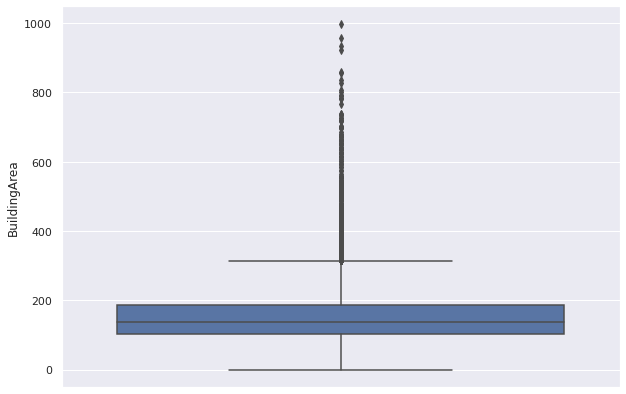

In [19]:
dataframe=dataframe.loc[dataframe.BuildingArea<1000]
plt.figure(figsize=(10,7))
sns.boxplot(y='BuildingArea',data=dataframe)

Lo mejor es eliminar las muestras que tienen areas construidas menores a 2 metros ya que posiblemente estos valores pequeños pueden ser errores de recoleccion.

In [20]:
dataframe.loc[dataframe.BuildingArea<2]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
998,Brunswick,329 Brunswick Rd,4,h,1175000.0,PI,Jellis,27/11/2016,5.2,3056.0,4.0,1.0,2.0,319.0,1.0,NaN,Moreland City Council,Northern Metropolitan,11918.0
1516,Coburg,40 Elizabeth St,1,h,1007000.0,SP,Brad,28/08/2016,7.8,3058.0,1.0,2.0,0.0,807.0,1.0,NaN,Darebin City Council,Northern Metropolitan,11204.0
3256,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051.0,2.0,1.0,1.0,215.0,0.0,2000.0,Melbourne City Council,Northern Metropolitan,6821.0
3294,North Melbourne,11/19 Wood St,2,u,587134.0,SP,Woodards,28/08/2016,2.3,3051.0,2.0,1.0,1.0,0.0,1.0,1970.0,Melbourne City Council,Northern Metropolitan,6821.0
3928,Richmond,5/285 Punt Rd,1,u,342000.0,S,Jellis,10/09/2016,2.6,3121.0,1.0,1.0,1.0,0.0,1.0,1970.0,Yarra City Council,Northern Metropolitan,14949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13112,Wollert,42 Rhone Dr,4,h,722500.0,S,LJH,17/02/2018,25.5,3750.0,4.0,2.0,2.0,512.0,0.0,NaN,Whittlesea City Council,Northern Metropolitan,2940.0
13249,Greenvale,26 Perugia Av,4,h,677000.0,S,Ray,17/03/2018,20.4,3059.0,4.0,2.0,2.0,312.0,0.0,2013.0,Hume City Council,Northern Metropolitan,4864.0
13320,Preston,91 Dundas St,3,h,950000.0,PI,Spencer,17/03/2018,8.4,3072.0,3.0,1.0,NaN,301.0,0.0,1935.0,Darebin City Council,Northern Metropolitan,14577.0
13395,Wollert,40 Whitebark St,4,h,615000.0,S,HAR,17/03/2018,25.5,3750.0,4.0,2.0,2.0,392.0,0.0,2015.0,Whittlesea City Council,Northern Metropolitan,2940.0


In [21]:
dataframe=dataframe.loc[dataframe['BuildingArea']>2]
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13617.0,3.148858e+00,0.972721,1.0,3.00,3.0,4.0,12.0
Price,10554.0,1.087639e+06,677427.144885,131000.0,640000.00,895000.0,1332500.0,9000000.0
Distance,13617.0,1.134834e+01,7.081709,0.0,6.40,10.2,14.2,48.1
Bedroom2,13617.0,3.126460e+00,0.974417,0.0,3.00,3.0,4.0,12.0
Bathroom,13617.0,1.691489e+00,0.737854,1.0,1.00,2.0,2.0,9.0
Car,13387.0,1.723239e+00,1.006464,0.0,1.00,2.0,2.0,26.0
Landsize,12038.0,5.271397e+02,1065.749579,0.0,212.25,479.0,656.0,42800.0
BuildingArea,13617.0,1.558294e+02,86.004568,3.0,103.00,136.0,188.0,999.0
YearBuilt,13136.0,1.964955e+03,37.870911,1196.0,1940.00,1970.0,2000.0,2106.0
Propertycount,13617.0,7.481586e+03,4315.252148,249.0,4387.00,6567.0,10331.0,21650.0


En el año de construccion se puede ver que hay datos que son demasiados descabellados como el menor año y el año máximo que es mayor al actual.

In [22]:
dataframe.loc[(dataframe['YearBuilt']>2018) | (dataframe['YearBuilt']<1800)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
1077,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105.0,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,Eastern Metropolitan,4480.0
6952,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,3.0,1.0,4.0,807.0,117.0,1196.0,Monash City Council,Eastern Metropolitan,13366.0
13135,Bentleigh,1 Wyuna Ct,3,h,1100000.0,VB,Woodards,17/03/2018,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Glen Eira City Council,Southern Metropolitan,6795.0


In [23]:
dataframe.drop(axis=0,labels=[1077,6952,13135],inplace=True)
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13614.0,3.148817e+00,0.972799,1.0,3.0,3.0,4.0,12.0
Price,10552.0,1.087627e+06,677490.452973,131000.0,640000.0,895000.0,1333500.0,9000000.0
Distance,13614.0,1.134809e+01,7.082446,0.0,6.4,10.2,14.2,48.1
Bedroom2,13614.0,3.126414e+00,0.974494,0.0,3.0,3.0,4.0,12.0
Bathroom,13614.0,1.691568e+00,0.737883,1.0,1.0,2.0,2.0,9.0
Car,13384.0,1.722878e+00,1.006189,0.0,1.0,2.0,2.0,26.0
Landsize,12035.0,5.270907e+02,1065.877317,0.0,212.0,479.0,656.0,42800.0
BuildingArea,13614.0,1.558187e+02,86.006029,3.0,103.0,136.0,188.0,999.0
YearBuilt,13133.0,1.964998e+03,37.252753,1800.0,1940.0,1970.0,2000.0,2018.0
Propertycount,13614.0,7.481424e+03,4315.352214,249.0,4387.0,6567.0,10331.0,21650.0


En el landsize y en el Propertycount se ve que hay valores maximos que son demasiados altos con respecto al resto. Esto se va a mirar con un boxplot

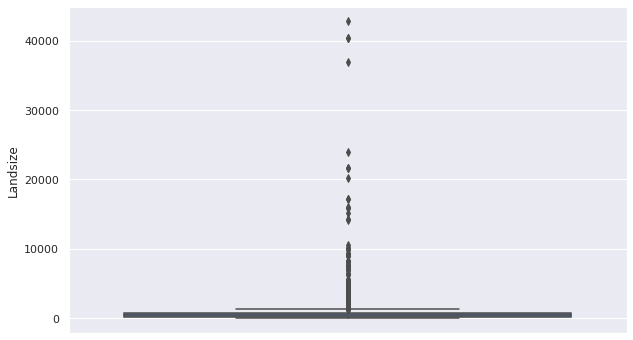

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x=None,data=dataframe,y='Landsize')

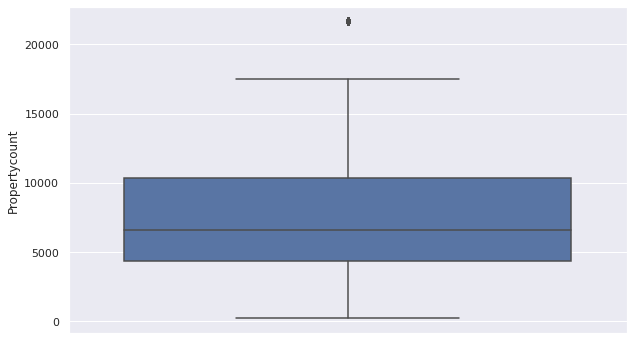

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=None,data=dataframe,y='Propertycount')

En el tamaño del area no construida se eliminan las muestras por encima de 20000 porque estan mas dispersas del resto de los datos, al igual que con la columna de propertycount

In [26]:
dataframe=dataframe.loc[dataframe.Landsize<20000]
dataframe=dataframe.loc[dataframe.Propertycount<20000]
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,11801.0,3.144140e+00,0.977797,1.0,3.0,3.0,4.0,12.0
Price,9091.0,1.104256e+06,680721.831474,131000.0,650000.0,910000.0,1360000.0,9000000.0
Distance,11801.0,1.102792e+01,6.899651,0.0,6.3,9.7,13.9,48.1
Bedroom2,11801.0,3.119142e+00,0.979903,0.0,3.0,3.0,4.0,12.0
Bathroom,11801.0,1.689094e+00,0.744943,1.0,1.0,2.0,2.0,9.0
Car,11621.0,1.704242e+00,1.007138,0.0,1.0,2.0,2.0,26.0
Landsize,11801.0,5.082568e+02,682.364878,0.0,213.0,479.0,657.0,17200.0
BuildingArea,11801.0,1.552735e+02,85.046359,3.0,102.0,136.0,187.0,934.0
YearBuilt,11389.0,1.963462e+03,37.486064,1800.0,1940.0,1970.0,1999.0,2018.0
Propertycount,11801.0,7.202939e+03,3858.302934,335.0,4380.0,6543.0,9758.0,17496.0


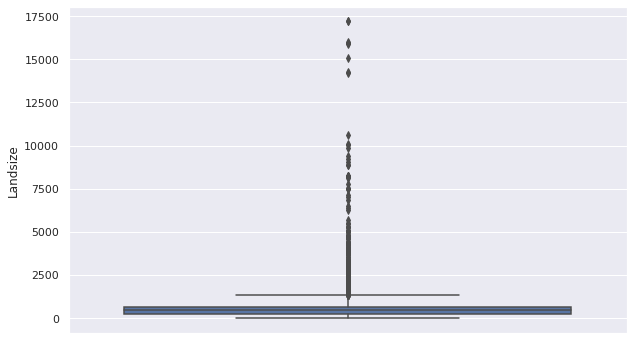

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x=None,data=dataframe,y='Landsize')

Examinar valores nulos

In [28]:
dataframe.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            2710
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               180
Landsize            0
BuildingArea        0
YearBuilt         412
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
dataframe.shape

(11801, 19)

Conocer la cantidad de valores en total por columna para proceder con el llenado de nulos.

In [29]:
dataframe['Price'].value_counts(dropna=False)

NaN          2710
600000.0       87
1300000.0      78
1100000.0      68
650000.0       67
             ... 
904000.0        1
3460000.0       1
1557000.0       1
1813000.0       1
2545000.0       1
Name: Price, Length: 1858, dtype: int64

In [30]:
dataframe['YearBuilt'].value_counts(dropna=False)

1970.0    1012
1960.0     930
1950.0     813
1980.0     521
1900.0     498
          ... 
1830.0       1
1894.0       1
1884.0       1
1855.0       1
1942.0       1
Name: YearBuilt, Length: 149, dtype: int64

Como hay demasiados valores nulos en el precio, seria un error llenarlos con el dato mas repetido, asi que la mejor estrategia es eliminar esas muestras

In [31]:
dataframe.dropna(axis=0,subset=['Price'],inplace=True)
dataframe.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car              136
Landsize           0
BuildingArea       0
YearBuilt        331
CouncilArea        0
Regionname         0
Propertycount      0
dtype: int64

Lo que sigue es cambiar el tipo de variable de la fecha de venta para poder manipularla y asi integrarla con la fecha.

In [32]:
dataframe['Date']=dataframe['Date'].astype('datetime64[ns]')
dataframe['Price']=dataframe['Price'].astype('int64')
dataframe['Bathroom']=dataframe['Bathroom'].astype('int64')
dataframe.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                     int64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode               category
Bedroom2                float64
Bathroom                  int64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Regionname               object
Propertycount           float64
dtype: object

In [33]:
dataframe['Date']=dataframe['Date'].dt.year
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016,2.5,3067.0,2.0,1,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017,2.5,3067.0,3.0,2,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016,2.5,3067.0,3.0,1,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016,2.5,3067.0,4.0,2,0.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016,2.5,3067.0,2.0,1,2.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,4019.0


Para llenar la caracteristica de numero de garajes, se llena con el mas frecuente y no por la media ya que esta caracteristica no puede ser decimal.

El año de construccion se llenara con la moda.

Como hay muchos mas valores nulos que de las otras muestras en la caracteristica del precio sera mejor eliminar esas muestras.

Se va a crear una caracteristica nueva llamada Age que es la resta de la fecha de venta y de construccion, otra caracteristica sera el area total que sera la suma del area construida y no construida.

In [34]:
dataframe['YearBuilt'].fillna(value=dataframe['YearBuilt'].mode()[0],inplace=True)
dataframe['YearBuilt']=dataframe['YearBuilt'].astype('int64')
dataframe.dtypes

Suburb             object
Address            object
Rooms               int64
Type               object
Price               int64
Method             object
SellerG            object
Date                int64
Distance          float64
Postcode         category
Bedroom2          float64
Bathroom            int64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt           int64
CouncilArea        object
Regionname         object
Propertycount     float64
dtype: object

In [ ]:
dataframe.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car              136
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea        0
Regionname         0
Propertycount      0
dtype: int64

In [35]:
dataframe['Age']=dataframe['Date']- dataframe['YearBuilt']
dataframe['TotalArea']=dataframe['Landsize']+dataframe['BuildingArea']
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Age,TotalArea
0,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016,2.5,3067.0,2.0,1,0.0,156.0,79.0,1900,Yarra City Council,Northern Metropolitan,4019.0,116,235.0
1,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017,2.5,3067.0,3.0,2,0.0,134.0,150.0,1900,Yarra City Council,Northern Metropolitan,4019.0,117,284.0
2,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016,2.5,3067.0,3.0,1,2.0,120.0,142.0,2014,Yarra City Council,Northern Metropolitan,4019.0,2,262.0
4,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016,2.5,3067.0,4.0,2,0.0,245.0,210.0,1910,Yarra City Council,Northern Metropolitan,4019.0,106,455.0
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016,2.5,3067.0,2.0,1,2.0,256.0,107.0,1890,Yarra City Council,Northern Metropolitan,4019.0,126,363.0


## **Seleccion de Caracteristicas**

In [36]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,9091.0,3.101309e+00,0.963109,1.0,2.00,3.0,4.000,12.0
Price,9091.0,1.104256e+06,680721.831474,131000.0,650000.00,910000.0,1360000.000,9000000.0
Date,9091.0,2.016739e+03,0.661045,2016.0,2016.00,2017.0,2017.000,2018.0
Distance,9091.0,1.115157e+01,6.918003,0.0,6.35,9.9,14.000,47.4
Bedroom2,9091.0,3.080299e+00,0.966398,0.0,2.00,3.0,4.000,12.0
Bathroom,9091.0,1.655373e+00,0.726012,1.0,1.00,2.0,2.000,9.0
Car,8955.0,1.692686e+00,0.969162,0.0,1.00,2.0,2.000,10.0
Landsize,9091.0,5.005764e+02,676.924272,0.0,208.00,468.0,651.000,17200.0
BuildingArea,9091.0,1.510926e+02,83.083481,3.0,100.00,133.0,181.000,934.0
YearBuilt,9091.0,1.965059e+03,36.078914,1830.0,1945.00,1970.0,1998.000,2018.0


En la descripcion se puede ver que hay edades negativos lo que no tiene sentido, asi que mejor sera eliminarlos.

In [37]:
dataframe=dataframe.loc[dataframe.Age>0]
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,9035.0,3.099059e+00,0.962798,1.0,2.0,3.0,4.0,12.0
Price,9035.0,1.102456e+06,679638.934005,131000.0,650000.0,907000.0,1354500.0,9000000.0
Date,9035.0,2.016740e+03,0.661270,2016.0,2016.0,2017.0,2017.0,2018.0
Distance,9035.0,1.115976e+01,6.932452,0.0,6.3,9.9,14.0,47.4
Bedroom2,9035.0,3.077255e+00,0.965653,0.0,2.0,3.0,4.0,12.0
Bathroom,9035.0,1.649585e+00,0.721640,1.0,1.0,2.0,2.0,9.0
Car,8899.0,1.692662e+00,0.970712,0.0,1.0,2.0,2.0,10.0
Landsize,9035.0,5.009043e+02,678.803652,0.0,207.0,468.0,651.0,17200.0
BuildingArea,9035.0,1.506264e+02,82.821833,3.0,100.0,133.0,181.0,934.0
YearBuilt,9035.0,1.964740e+03,35.960350,1830.0,1942.5,1970.0,1997.0,2017.0


Despues de haber manipulado los datos nulos, lo que sigue es seleccionar las caracteristicas, ya sea eliminando o creando una nueva a partir de las existentes.\
Con respecto a las caracteristicas de Suburb, Address, Regionname and Council Area estan relacionadas con la ubicación, entonces para evitar redundancias en esa categoria solo se usara la columna de la Region. \
Con las columnas de LandSize y BuildingArea como se refieren a tamaño se creara una columna nueva que sea la suma de estas 2 y se eliminaran las otras 2. \
La antiguedad de la casa es muy importante a la hora de dar el precio es importante y para eso se debe tener en cuenta tanto el año de construccion como el año en que se vendio, asi que se creara una columna que sea la resta  y se eliminan las otras 2. \
Como la agencia de ventas no es tan crucial a la hora de dar el precio a una casa, entonces la columna  SellerG se elimina.

Como aun existen variables cualitativas y no se pueden escoger todas, por medio de las graficas de violinplot se puede conocer la relación y la influencia de estas en el precio

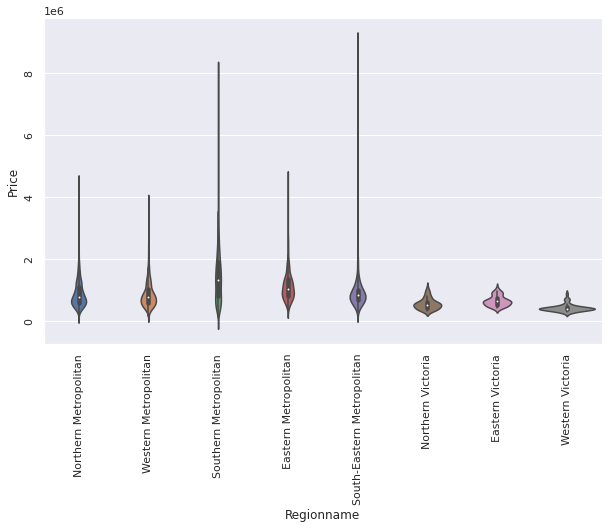

In [ ]:
#Conocer la relacion existente entre la region y el precio
fig, ax=plt.subplots(figsize=(10,6))
sns.violinplot(data=dataframe,x='Regionname',y='Price',ax=ax)
ax.tick_params(labelrotation=90)

Se puede ver que la region influye en el precio porque en cada concentración de datos tiene un valor de precio

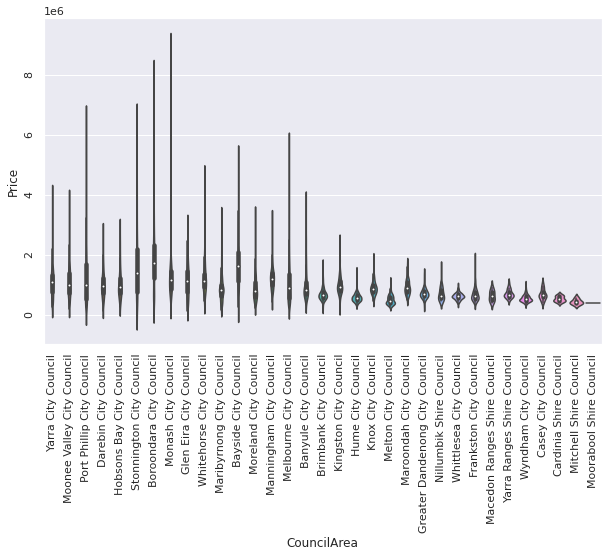

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.violinplot(data=dataframe,x='CouncilArea',y='Price',ax=ax)
ax.tick_params(labelrotation=90)

El area administrativa esta relacionada con el precio de la casa como se puede ver en la grafica anterior

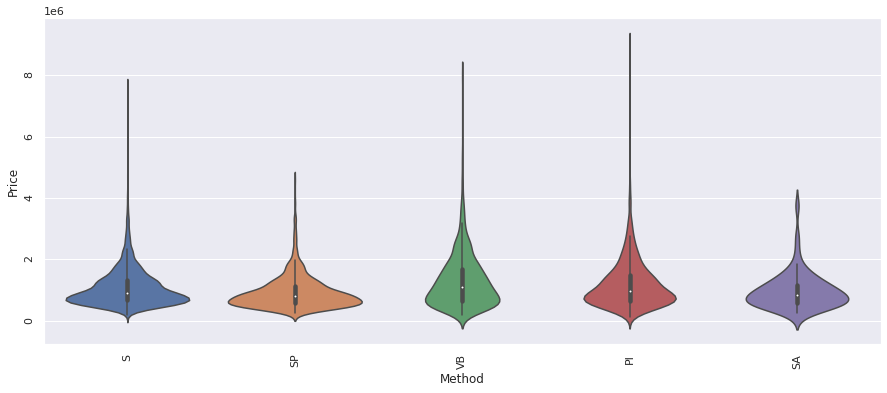

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=dataframe,x='Method',y='Price',ax=ax)#Conocer la relacion existente entre El method y el precio
ax.tick_params(labelrotation=90)

Esta variable anterior se podria descartar porque sus concentraciones con respecto a los precios son parecidas

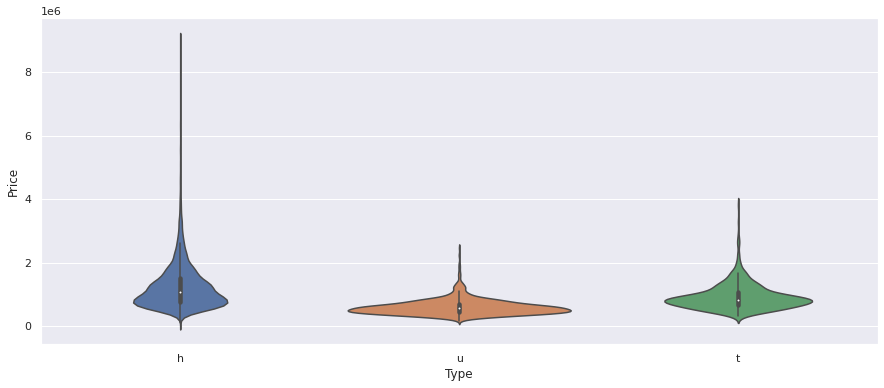

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=dataframe,x='Type',y='Price',ax=ax)#Conocer la relacion existente entre El Type y el precio

En la anterior casa se puede ver que el tipo de casa influye en el precio

In [38]:
dataframe.drop(columns=['Suburb','Address','SellerG','Method','Landsize',
                        'BuildingArea','Date','YearBuilt'],inplace=True)
dataframe.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Regionname,Propertycount,Age,TotalArea
0,2,h,1035000,2.5,3067.0,2.0,1,0.0,Yarra City Council,Northern Metropolitan,4019.0,116,235.0
1,3,h,1465000,2.5,3067.0,3.0,2,0.0,Yarra City Council,Northern Metropolitan,4019.0,117,284.0
2,4,h,1600000,2.5,3067.0,3.0,1,2.0,Yarra City Council,Northern Metropolitan,4019.0,2,262.0
4,3,h,1876000,2.5,3067.0,4.0,2,0.0,Yarra City Council,Northern Metropolitan,4019.0,106,455.0
7,2,h,1636000,2.5,3067.0,2.0,1,2.0,Yarra City Council,Northern Metropolitan,4019.0,126,363.0


## **Variables Numéricas**

Ahora lo que corresponde hacer con las variables numéricas es hallar la correlación existente entre ellas y asi poder escoger las más correlacionadas  con el precio y al mismo tiempo escoger variables independientes que no estan tan correlacionadas.

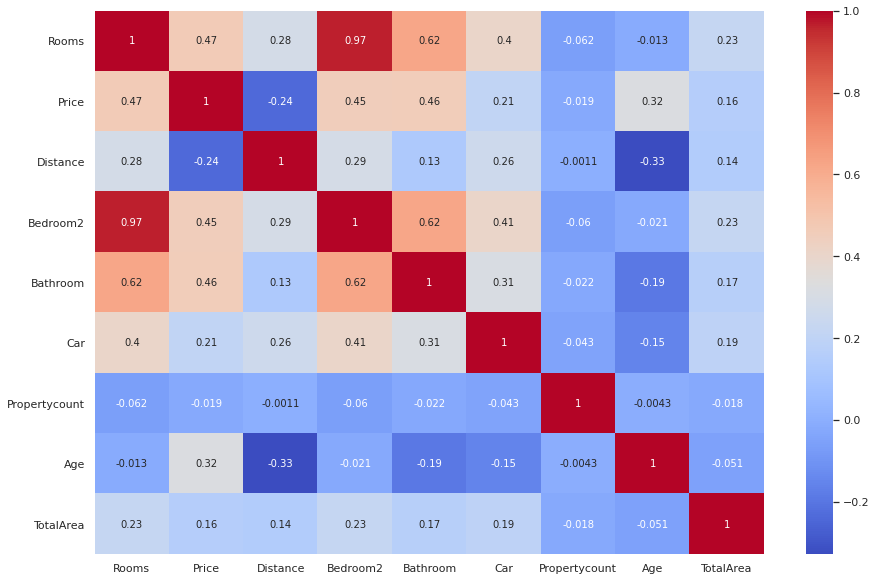

In [39]:
corr=dataframe.corr()
fig, ax= plt.subplots(figsize=(15,10))#Hallar correlacion entre las variables numericas
sns.heatmap(data=corr,annot=True,cmap='coolwarm')

Del mapa de calor anterior se evidencia que la columna de Bedroom2 esta muy correlacionada con el numero de habitaciones, entonces es mejor eliminarla para evitar las redundancias. Del resto de las caracteristicas con el valor del coeficiente son independientes entre si.

In [40]:
dataframe.drop(columns=['Bedroom2'],inplace=True)
dataframe.head()

,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,CouncilArea,Regionname,Propertycount,Age,TotalArea
0,2,h,1035000,2.5,3067.0,1,0.0,Yarra City Council,Northern Metropolitan,4019.0,116,235.0
1,3,h,1465000,2.5,3067.0,2,0.0,Yarra City Council,Northern Metropolitan,4019.0,117,284.0
2,4,h,1600000,2.5,3067.0,1,2.0,Yarra City Council,Northern Metropolitan,4019.0,2,262.0
4,3,h,1876000,2.5,3067.0,2,0.0,Yarra City Council,Northern Metropolitan,4019.0,106,455.0
7,2,h,1636000,2.5,3067.0,1,2.0,Yarra City Council,Northern Metropolitan,4019.0,126,363.0


In [41]:
dataframe['CouncilArea']=dataframe['CouncilArea'].astype('category')
dataframe['Type']=dataframe['Type'].astype('category')
dataframe['Regionname']=dataframe['Regionname'].astype('category')
dataframe.dtypes

Rooms               int64
Type             category
Price               int64
Distance          float64
Postcode         category
Bathroom            int64
Car               float64
CouncilArea      category
Regionname       category
Propertycount     float64
Age                 int64
TotalArea         float64
dtype: object

Hay que realizar luego la separación de los datos de train y test porque primero se hara la selección del modelo mediante validacion cruzada de los datos de entrenamiento y despues el mejor modelo se evalua con los datos de test.

In [52]:
#Separacion de los datos de entrenamiento y test
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataframe['CouncilArea']=le.fit_transform(dataframe['CouncilArea'].values)
#dataframe.drop(columns=['Postcode'],inplace=True,axis='columns')
X=dataframe.drop(columns=['Price'],axis='columns')
y= dataframe[['Price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=42)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
si=SimpleImputer(strategy='most_frequent',missing_values=np.nan)
num_col=X.select_dtypes(exclude='category').columns
cat_col=['Regionname','Type']
ohe=OneHotEncoder(drop='first')
num_transform=Pipeline([('si',si),('ss',StandardScaler())])
cat_transform=Pipeline([('ohe',ohe)])
ct=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])

## **Modelo Base**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
modelo=Pipeline([('ct',ct),
                 ('lr',LinearRegression())])

In [ ]:
modelo.get_params()

In [55]:
from sklearn.model_selection import cross_validate
scores=cross_validate(modelo,X_train,y_train,cv=5,scoring='neg_mean_absolute_error',return_train_score=True)

In [ ]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [56]:
print(f"MAE de Entrenamiento {-1*scores['train_score'].mean()}")
print(f"MAE de Validacion {-1*scores['test_score'].mean()}")

MAE de Entrenamiento 275864.25679998833
MAE de Validacion 276897.3649439969


Partiendo de que con el modelo de Regresion Lineal se obtiene un error promedio muy alto, y partiendo de que el precio minimo es de 131000 dolares un error aceptable podria ser de 20000 dolares maximo.

## **Modelo no Lineal**

Lo que se busca es reducir la funcion de costo la cual es la siguente: 
\begin{eqnarray}
L = \frac{1}{n} \sum_{i=1}^n  (y_i - \hat y_i)^2
\end{eqnarray}
Una de los algoritmos usados es el de Gradiente Descendente, con el cual se va a obtener el mejor modelo aplicando gridsearch 

In [ ]:
from sklearn.svm import SVR
ct2=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model2=modelo=Pipeline([('ct',ct2),
                 ('svr',SVR(gamma='auto',kernel='rbf'))])
model2.get_params()

In [ ]:
model2.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
epsilons=np.linspace(0.1,1,10)
C=[1,10,100]
dicc={'svr__epsilon':epsilons,'svr__C':C}
clf=GridSearchCV(estimator=model2,param_grid=dicc,scoring='neg_mean_absolute_error',cv=5,
                 return_train_score=True)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
print(f'Mejores hiperparametros encontrados {clf.best_params_}')
print(f"Training MAE {-1*clf.cv_results_['mean_train_score'].max()}")
print(f"Validation MAE {-1*clf.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros encontrados {'svr__C': 100, 'svr__epsilon': 0.1}
Training MAE 444919.7949557607
Validation MAE 445081.528606502


## **Utilizando DT Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ct3=ct=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model3=Pipeline([('ct',ct3),
                 ('dt',DecisionTreeRegressor(random_state=42,criterion='mae'))])
model3.get_params()

In [58]:
from sklearn.model_selection import GridSearchCV
depth=range(2,12,2)
samples=range(2,12,2)
dicc2={'dt__max_depth':depth,'dt__min_samples_split':samples}
clf3=GridSearchCV(estimator=model3,scoring='neg_mean_absolute_error',cv=5,param_grid=dicc2,return_train_score=True)

In [ ]:
clf3.fit(X_train,y_train)

In [61]:
print(f'Mejores hiperparametros: {clf3.best_params_}')
print(f"MAE train {-1*clf3.cv_results_['mean_train_score'].max()}")
print(f"MAE validation {-1*clf3.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros: {'dt__max_depth': 10, 'dt__min_samples_split': 10}
MAE train 134471.38341482592
MAE validation 231566.46721489294


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
ct4=ct=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model4=Pipeline([('ct',ct4),
                 ('knn',KNeighborsRegressor())])
model4.get_params()

In [63]:
vecinos=range(2,20,1)
dic={'knn__n_neighbors':vecinos}
clf4=GridSearchCV(estimator=model4,param_grid=dic,scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

In [ ]:
clf4.fit(X_train,y_train)

In [66]:
print(f'Mejores hiperparametros: {clf4.best_params_}')
print(f"MAE train {-1*clf4.cv_results_['mean_train_score'].max()}")
print(f"MAE validation {-1*clf4.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros: {'knn__n_neighbors': 9}
MAE train 130358.0500134539
MAE validation 217907.21038404928


## **Usando Métodos de ensamble Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ct5=ct=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model5=Pipeline([('ct',ct5),
                 ('rfr',RandomForestRegressor(criterion='mae',n_jobs=-1))])
model5.get_params()

In [68]:
Dic = {
    "rfr__n_estimators": [10, 100],
    "rfr__max_depth": [10, 100],
    "rfr__max_features": ["auto", "log2"]
}
clf5=GridSearchCV(estimator=model5,param_grid=Dic,scoring='neg_mean_absolute_error',
                  cv=5,return_train_score=True,n_jobs=-1)

In [ ]:
clf5.fit(X_train,y_train)

In [70]:
print(f'Mejores hiperparametros del metodo de ensamble {clf5.best_params_}')
print(f"MAE train {-1*clf5.cv_results_['mean_train_score'].max()}")
print(f"MAE validation {-1*clf5.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros del metodo de ensamble {'rfr__max_depth': 100, 'rfr__max_features': 'log2', 'rfr__n_estimators': 100}
MAE train 69574.82532628987
MAE validation 176345.15474982094


Se puede evidenciar que con los metodos de ensamble se obtienen mejores puntajes, asi que este será el modelo para realizar la evaluación.

## **Utilizando Bangging**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
ct6=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model6=Pipeline([('ct',ct6),
                 ('bag',BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mae',max_features=None),random_state=42))])
model6.get_params()

In [84]:
params={'bag__n_estimators':[10,100],
        'bag__max_samples':[20],
        'bag__max_features':[5,10]}
clf6=GridSearchCV(estimator=model6,param_grid=params,scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

In [ ]:
clf6.fit(X_train,y_train)

In [86]:
print(f'Mejores hiperparametros del metodo de ensamble {clf6.best_params_}')
print(f"MAE train {-1*clf6.cv_results_['mean_train_score'].max()}")
print(f"MAE validation {-1*clf6.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros del metodo de ensamble {'bag__max_features': 10, 'bag__max_samples': 20, 'bag__n_estimators': 100}
MAE train 332688.7531526451
MAE validation 334189.05499029916


## **GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
ct7=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                 ('cat',cat_transform,cat_col)])
model7=Pipeline([('ct',ct7),
                 ('gbr',GradientBoostingRegressor(criterion='mae',random_state=0,))])
model7.get_params()

In [80]:
param_grid={'gbr__n_estimators':[100], 
            'gbr__learning_rate': [0.1,0.05,0.02],
            'gbr__max_depth':[6], 
            'gbr__min_samples_leaf':[3]}
clf7=GridSearchCV(estimator=model7,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5,
                  return_train_score=True)

In [ ]:
clf7.fit(X_train,y_train)

In [82]:
print(f'Mejores hiperparametros del metodo de ensamble {clf7.best_params_}')
print(f"MAE train {-1*clf7.cv_results_['mean_train_score'].max()}")
print(f"MAE validation {-1*clf7.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros del metodo de ensamble {'gbr__learning_rate': 0.1, 'gbr__max_depth': 6, 'gbr__min_samples_leaf': 3, 'gbr__n_estimators': 100}
MAE train 122111.13796587272
MAE validation 175442.71913868847


Mejores Resultados

In [ ]:
best_model=clf7.best_estimator_
best_model.fit(X_train,y_train)

In [88]:
from sklearn import metrics
y_pred_train=best_model.predict(X_train)
y_pred_test=best_model.predict(X_test)
print(f'MAE train {metrics.mean_absolute_error(y_train,y_pred_train)}')
print(f'MAE test {metrics.mean_absolute_error(y_test,y_pred_test)}')

MAE train 125910.15945281988
MAE test 175096.1569474889


Efectivamente el modelo creado por los metodos de ensamble resulto teniendo una varianza muy alta porque el error obtenido con los datos de test es demasiado alto comparado con el train. Aun asi en el error obtenido durante el test es menor en comparacion con los modelos de regresion, Ridge y SGD. 